# Gold Price Prediction ML Model

Used Random Forest ML Algorithm

Installing the important libraries that we will help up in understanding the data better and also help us in building the prediction model.

In [1]:
!pip3 install pandas --quiet
!pip3 install matplotlib --quiet
!pip3 install seaborn --quiet
!pip3 install numpy --quiet
!pip3 install scipy --quiet
!pip3 install sklearn --quiet
import warnings  #this is used to suppress the warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
print("All libraries successfully installed")

All libraries successfully installed


Now we will import the libraries that we installed.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics

We will load the dataset which is in csv format and convert it into the pandas dataset. This dataset has been downloaded from www.kaggle.com The link for the dataset is: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [3]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 6)

Hence there are 2290 rows and 6 columns in the dataset.

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

This shows that there are no null values in the dataset.

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Now we will try to find the correlation between several different columns using the corr() function.
Correlation are of two types:-
1. Positive Correlation
2. Negative Correlation

In [10]:
correlation=gold_data.corr()

<AxesSubplot:>

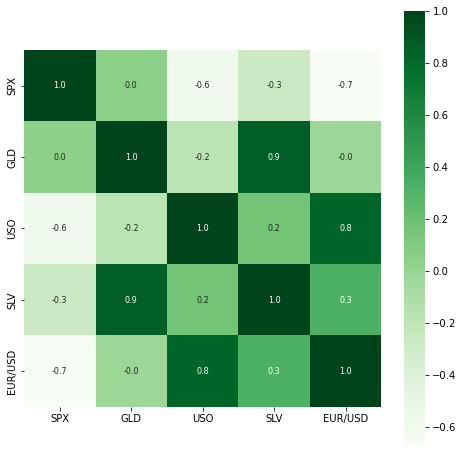

In [11]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Greens')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


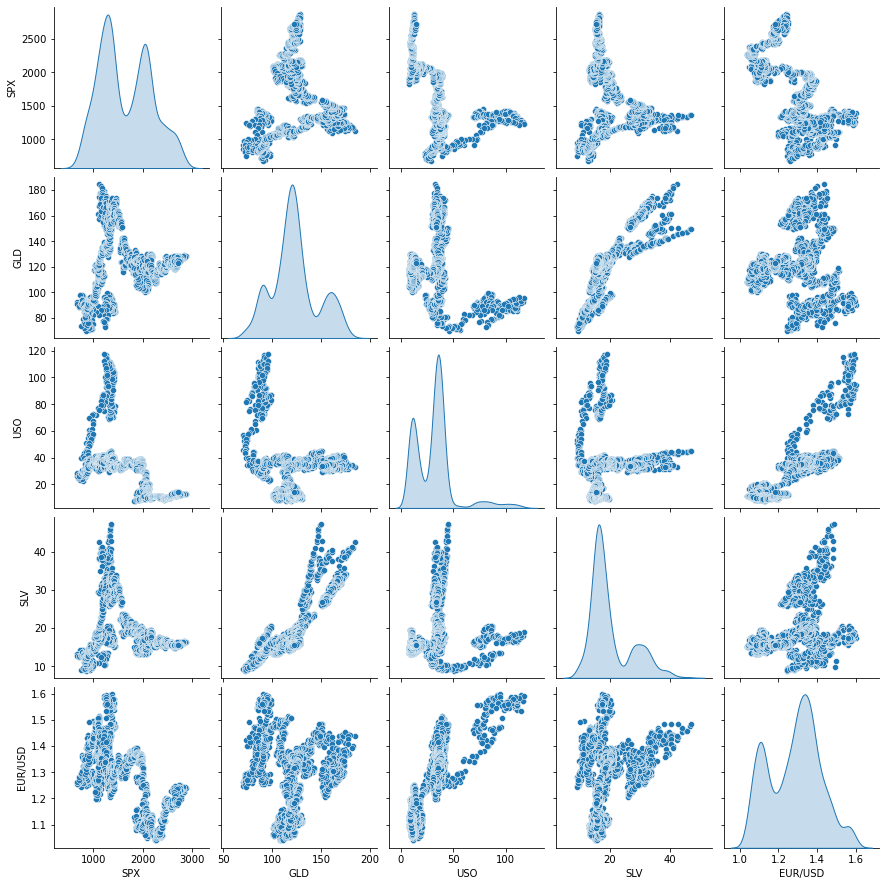

In [13]:
# generating the pair plot 
sns.pairplot(gold_data,diag_kind='kde')
plt.show()

No linear relationship between the attributes can be seen in the pair plot. So we can skip chosing linear regression as our machine learning algorithm. We will try other regression algorithms.

<AxesSubplot:xlabel='GLD', ylabel='Density'>

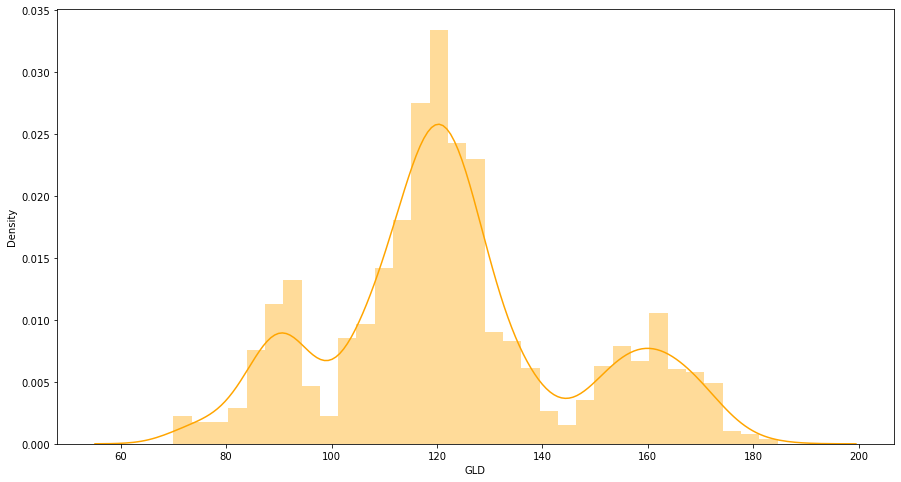

In [14]:
# checking the distribution of the GLD Price
plt.figure(figsize = (15,8))
sns.distplot(gold_data['GLD'],color='orange')

Price of gold data is between 100 and 140 for majority of data points.

Splitting the Features and Target

In [15]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

Here Y contains the dependent variable and X contains the independent variables. We have dropped the 'Date' column because it is redundant in our analysis.

In [16]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [17]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting the dataset into training data and testing data.

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Now we will start the machine learning process by training the model.

### First Model Training:Random Forest Algorithm 

In [19]:
#creating the random forest object
rf=RandomForestRegressor(n_estimators=100) 

Here the parameter 'n_estimators' denotes the number of trees in the forest.

Now we will train the random forest model by feeding it with the training data.

In [20]:
# training the random forest model
print(rf.fit(X_train,Y_train))  #trains as well as prints the status of the training
print('Random Forest Model has been trained and is ready for prediction.')

RandomForestRegressor()
Random Forest Model has been trained and is ready for prediction.


### Random Forest Model Evaluation

Now we will feed the test data to our Random Forest model and check out the predictions made by it.

In [21]:
# prediction on Test Data
rf_prediction = rf.predict(X_test)

In [22]:
rf_prediction

array([168.43459874,  81.94239994, 116.17269986, 127.58440075,
       120.76490134, 154.63609802, 150.31559932, 126.2124004 ,
       117.50469879, 125.95850108, 116.59790085, 172.1045004 ,
       141.22099847, 167.62989822, 115.15800034, 117.43630031,
       139.08830261, 170.51530141, 159.17120234, 159.30479967,
       155.16020012, 124.98440004, 176.48989953, 156.63780326,
       125.13340041,  93.85240003,  77.41700002, 120.41440013,
       119.03209891, 167.50919967,  88.07480087, 125.42670013,
        91.11300064, 117.70460038, 121.08329914, 135.94410086,
       115.46810093, 114.77030064, 147.61199965, 107.36890101,
       104.09770201,  87.28439817, 126.50240054, 117.88769995,
       151.464099  , 119.78329965, 108.42929954, 108.07479837,
        93.10640052, 127.18949773,  75.14050027, 113.7030988 ,
       121.37240008, 111.30059928, 118.865299  , 120.68609954,
       159.33170038, 168.74690078, 147.0861964 ,  85.77099841,
        94.23260032,  86.9154989 ,  90.73559972, 119.08

In [23]:
# R squared error for Random Forest:
rf_r2_score = metrics.r2_score(Y_test, rf_prediction)
print("R-Squared Score OR Accuracy Score for Decision Tree:", rf_r2_score)

R-Squared Score OR Accuracy Score for Decision Tree: 0.9883999651394559


Best R-Squared Score is 1 which is the ideal case. We have obtained a fairly well value of R-Squared Score, this implies that our model has been trained well and will predict well.

Comparing the actual values and the predicted values

In [24]:
Actual_GLD = list(Y_test)

In [25]:
Actual_GLD

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.210007,
 148.910004,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.669998,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.919998,
 105.639999,
 127.669

Plotting actual and predicted values simultaneously will give us better understanding about the accuracy of our model.

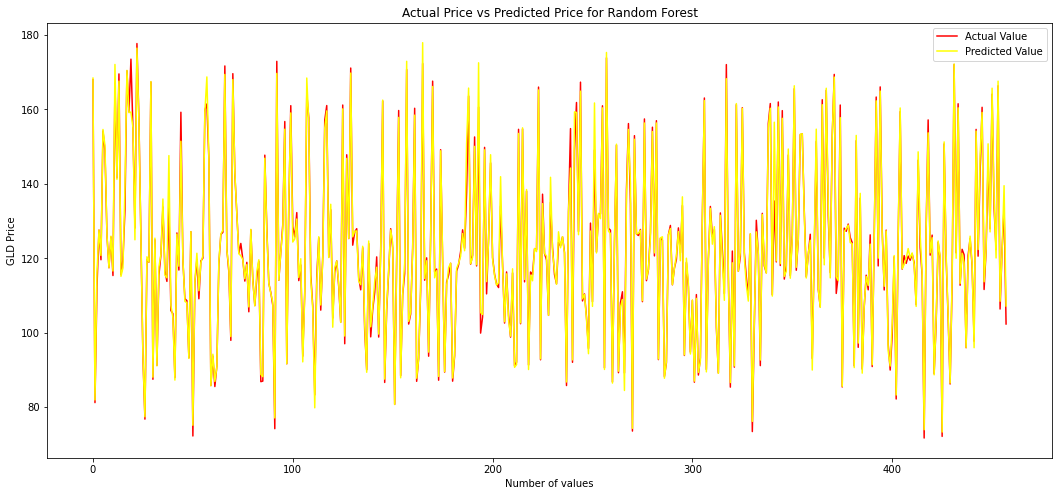

In [26]:
plt.figure(figsize = (18,8))
plt.plot(Actual_GLD, color='red', label = 'Actual Value')
plt.plot(rf_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Random Forest')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

We can clearly see the actual price of Gold are somewhat closer to the ones that are predicted by our model. So we can consider it to be a good model for the prediction of Gold Prices.

### Second Model Training : Decision Tree Algorithm 

In [27]:
#creating a decision tree object
dt=tree.DecisionTreeRegressor() 

Now we will train the decision tree model by feeding it with the training data.

In [28]:
#training the decision tree model
print(dt.fit(X_train,Y_train)) #trains as well as prints the status of the training
print('Decision Tree Model has been trained and is ready for prediction.')

DecisionTreeRegressor()
Decision Tree Model has been trained and is ready for prediction.


### Decision Tree Model Evaluation

Now we will feed the test data to our Decision Tree model and check out the predictions made by it.

In [29]:
# prediction on Test Data
dt_prediction=dt.predict(X_test)

In [30]:
dt_prediction

array([168.970001,  80.93    , 114.769997, 126.339996, 121.190002,
       155.669998, 149.149994, 126.809998, 117.639999, 125.620003,
       117.690002, 174.580002, 141.919998, 167.179993, 116.110001,
       116.75    , 134.100006, 168.970001, 159.570007, 132.850006,
       155.360001, 126.610001, 177.210007, 157.339996, 125.459999,
        93.720001,  73.080002, 122.290001, 118.589996, 167.990005,
        88.330002, 124.790001,  91.730003, 118.68    , 121.449997,
       136.050003, 114.57    , 115.800003, 151.990005, 105.720001,
       104.370003,  87.239998, 127.610001, 118.769997, 155.919998,
       119.959999, 107.980003, 107.519997,  93.800003, 128.539993,
        73.300003, 113.260002, 120.110001, 110.879997, 118.519997,
       121.129997, 161.320007, 161.520004, 146.869995,  85.199997,
        93.040001,  86.879997,  90.949997, 119.169998, 126.139999,
       127.419998, 173.490005, 122.970001, 116.209999,  97.699997,
       169.820007, 142.050003, 134.279999, 120.910004, 122.739

In [31]:
# R squared error
dt_error_score = metrics.r2_score(Y_test, dt_prediction)
print("R-Squared Error OR Accuracy Score for Decision Tree:", dt_error_score)

R-Squared Error OR Accuracy Score for Decision Tree: 0.9824915271138356


We have obtained a fairly high value of R-Squared Score but it less than that obtained in the case of Random Forest. So we can say that Random Forest Model will make comparatively more accurate predictions than Decision Tree. 

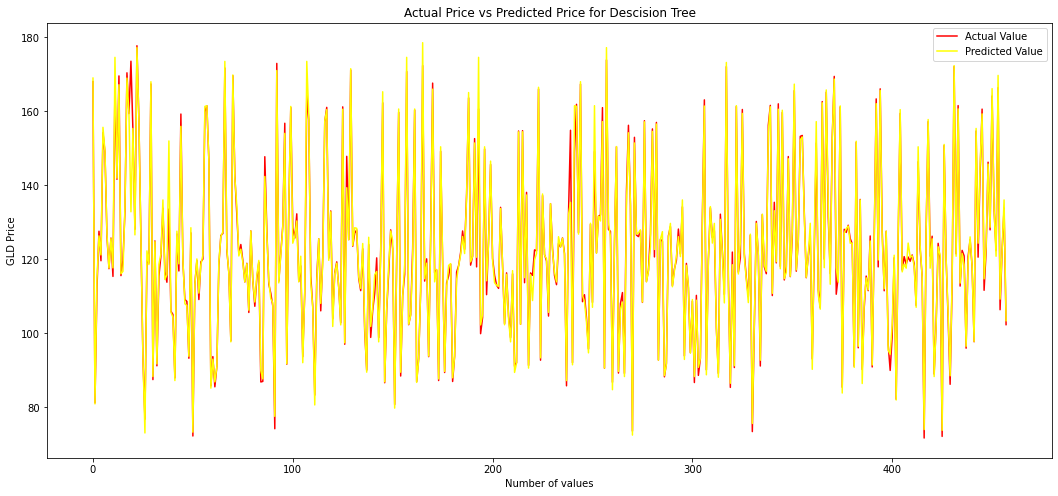

In [32]:
plt.figure(figsize = (18,8))
plt.plot(Actual_GLD, color='red', label = 'Actual Value')
plt.plot(dt_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price for Descision Tree')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

We can clearly see the actual price of Gold are somewhat closer to the ones that are predicted by our model.

### Combined Dataset

Now we can see all the three values: Actual GLD | Predicted GLD by RF | Predicted GLD by DT

In [33]:
X_test['Actual GLD']=Actual_GLD
X_test['Predicted GLD by RF']=rf_prediction
X_test['Predicted GLD by DT']=dt_prediction
X_test

,SPX,USO,SLV,EUR/USD,Actual GLD,Predicted GLD by RF,Predicted GLD by DT
903,1351.949951,38.330002,32.900002,1.324854,168.020004,168.434599,168.970001
129,1271.510010,93.900002,13.450000,1.472581,81.230003,81.942400,80.930000
1787,1880.050049,8.910000,14.340000,1.119996,112.320000,116.172700,114.769997
1913,2181.300049,10.960000,18.620001,1.127142,127.589996,127.584401,126.339996
2048,2352.949951,10.680000,17.320000,1.067247,119.620003,120.764901,121.190002
...,...,...,...,...,...,...,...
923,1370.869995,41.090000,33.220001,1.327492,166.380005,167.617798,169.699997
1693,1952.290039,14.930000,13.990000,1.129089,106.379997,108.474699,109.250000
2054,2349.010010,11.060000,17.430000,1.064453,122.239998,121.738898,122.019997
658,1273.849976,37.680000,28.420000,1.315686,133.830002,139.526001,136.050003


Some values are predicted well by Random Forest Model whereas some are predicted well by Decision Tree. Although the Accuracy Score of Random Forest is slightly higher than Decision Tree. So Random Forest Model can be a better fit for solving this problem. 